**Attributes 1 to 4 refer to the data of the patient:**
1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
**Attributes 5 to 14 refer to laboratory data:**

5. ALB (Albumin Blood Test)
6. ALP (Alkaline phosphatase)
7. ALT (Alanine Transaminase)
8. AST (Aspartate Transaminase)
9. BIL (Bilirubin)
10. CHE (Acetylcholinesterase)
11. CHOL (Cholesterol)
12. CREA (Creatinine)
13. GGT (Gamma-Glutamyl Transferase)
14. PROT (Proteins)

The target attribute for classification is Category

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# Reading the dataset
df = pd.read_csv('C://Users/Mohammad/Desktop/term 1/dade kavi/project/HepatitisCdata.csv')
df.shape

(615, 14)

In [3]:
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [4]:
#Droping Id column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [6]:
#Checking for Duplicated Rows
df_duplicated = df[df.duplicated()]
print(df_duplicated.shape)

(0, 13)


**Dealing with missing values**

In [7]:
# number of each column's N/A
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
df_mean = df.copy()

In [9]:
#filling missing values with medians of their columns
df.fillna(df.median(),inplace= True)

In [10]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [11]:
#filling missing values with average of their columns
df_mean.fillna(df.mean(),inplace= True)

In [12]:
df_mean.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [13]:
#excluding numeric attributes
numeric = df[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']] 
df_numeric=pd.DataFrame(numeric)
df_numeric.head()

Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7

filling missing values with KNN

In [14]:
df_knn = df_numeric.copy()

In [15]:
from sklearn.impute import KNNImputer
# fitting KNN model for imputation
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(imputed, columns=df_numeric.columns)

In [16]:
df_knn.isnull().sum()

Age     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64

**Recoding nominal attributes**

Sex: {"m"=1} , {"f"=0}

Category: {"0=Blood Donor"=1 , "0s=suspect Blood Donor"=1} , {"1=Hepatitis"=0 , "2=Fibrosis"=0 , "3=Cirrhosis"=0}


In [17]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [18]:
# converting sex column from object to category
df["Sex"] = df["Sex"].astype("category")
df.dtypes

Category      object
Age            int64
Sex         category
ALB          float64
ALP          float64
ALT          float64
AST          float64
BIL          float64
CHE          float64
CHOL         float64
CREA         float64
GGT          float64
PROT         float64
dtype: object

In [19]:
# giving codes to "sex" column
df["recoded_sex"] = df["Sex"].cat.codes

<AxesSubplot:>

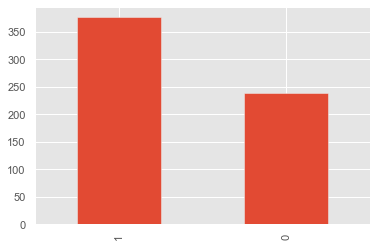

In [20]:
# bar chart of "sex"
plt.style.use('ggplot')
df['recoded_sex'].value_counts().plot(kind='bar')

In [21]:
# wherever finds "Blood donor" assign 1 otherwise 0 
df["recoded_category"] = np.where(df["Category"].str.contains("Blood Donor"), 1, 0)
df.tail(85)

Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  \
530           0=Blood Donor   65   f  33.0   74.3   13.2   16.8   4.1   7.46   
531           0=Blood Donor   68   f  41.4  102.3   38.4   26.4   6.8   8.50   
532           0=Blood Donor   70   f  40.0   97.9   15.1   15.9   6.8  11.46   
533  0s=suspect Blood Donor   47   m  22.5  124.0   79.5   46.7   2.3   6.83   
534  0s=suspect Blood Donor   48   m  24.9  116.9   49.2   24.3   4.9   3.44   
..                      ...  ...  ..   ...    ...    ...    ...   ...    ...   
610             3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57   
611             3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54   
612             3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66   
613             3=Cirrhosis   46   f  33.0   66.2   39.0   62.0  20.0   3.56   
614             3=Cirrhosis   59   f  36.0   66.2  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT  recoded_sex  recoded_category  
530  5.76   52.0    9.1  64.2            0                 1  
531  6.79   59.0   23.8  68.9            0                 1  
532  5.08   62.0   19.2  65.3            0                 1  
533  4.30  170.0  345.6  58.6            1                 1  
534  5.25   29.0   83.0  47.8            1                 1  
..    ...    ...    ...   ...          ...               ...  
610  6.30   55.7  650.9  68.5            0                 0  
611  3.02   63.0   35.9  71.3            0                 0  
612  3.63   66.7   64.2  82.0            0                 0  
613  4.20   52.0   50.0  71.0            0                 0  
614  5.30   67.0   34.0  68.0            0                 0  

[85 rows x 15 columns]

<AxesSubplot:>

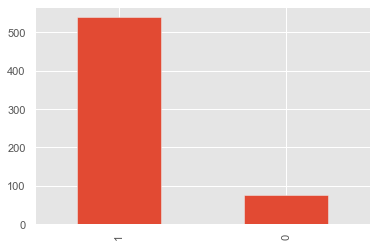

In [22]:
# bar chart of "recoded_category"
df['recoded_category'].value_counts().plot(kind='bar')

In [23]:
#Droping Sex & Category columns
df.drop('Sex',axis=1,inplace=True)
df.drop('Category',axis=1,inplace=True)
df.head()

Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT  \
0   32  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0   
1   32  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5   
2   32  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3   
3   32  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7   
4   32  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7   

   recoded_sex  recoded_category  
0            1                 1  
1            1                 1  
2            1                 1  
3            1                 1  
4            1                 1

**Scaling**

In [24]:
from sklearn.preprocessing import scale, normalize, minmax_scale, StandardScaler

In [25]:
#min-max scaling
scale_data=minmax_scale(df_numeric)
df_minmax=pd.DataFrame(scale_data , columns=df_numeric.columns)
df_minmax

Age       ALB       ALP       ALT       AST       BIL       CHE  \
0    0.224138  0.350669  0.101653  0.020962  0.036694  0.026461  0.367578   
1    0.224138  0.350669  0.145571  0.052713  0.044990  0.012243  0.650434   
2    0.224138  0.475483  0.156427  0.108816  0.134014  0.020932  0.494997   
3    0.224138  0.420505  0.100419  0.091554  0.038290  0.071485  0.394263   
4    0.224138  0.361070  0.154947  0.097719  0.045310  0.034755  0.515677   
..        ...       ...       ...       ...       ...       ...       ...   
610  0.741379  0.254086  1.000000  0.015413  0.318124  0.194313  0.276851   
611  0.775862  0.135215  0.225759  0.006165  0.107849  0.075829  0.008005   
612  0.775862  0.209510  0.187515  0.008015  0.282068  0.186414  0.016011   
613  0.465517  0.268945  0.135455  0.117448  0.164008  0.075829  0.142762   
614  0.689655  0.313522  0.135455  0.305487  0.221442  0.044234  0.510340   

         CHOL      CREA       GGT      PROT  
0    0.218447  0.091495  0.011757  0.535398  
1    0.408981  0.061619  0.017172  0.701327  
2    0.457524  0.072822  0.044400  0.763274  
3    0.401699  0.067221  0.045328  0.683628  
4    0.350728  0.063486  0.039295  0.528761  
..        ...       ...       ...       ...  
610  0.591019  0.044534  1.000000  0.524336  
611  0.192961  0.051349  0.048577  0.586283  
612  0.266990  0.054803  0.092358  0.823009  
613  0.336165  0.041079  0.070390  0.579646  
614  0.469660  0.055084  0.045637  0.513274  

[615 rows x 11 columns]

In [26]:
# Standard scalling
# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_zscore = pd.DataFrame(std_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_zscore

Age       ALB        ALP       ALT       AST       BIL       CHE  \
0   -1.533616 -0.540739  -0.613566 -0.815675 -0.383693 -0.198236 -0.574734   
1   -1.533616 -0.540739   0.081055 -0.410629 -0.305057 -0.381375  1.349161   
2   -1.533616  0.914755   0.252759  0.305084  0.538767 -0.269457  0.291926   
3   -1.533616  0.273645  -0.633077  0.084865 -0.368571  0.381706 -0.393234   
4   -1.533616 -0.419448   0.229345  0.163515 -0.302033 -0.091404  0.432588   
..        ...       ...        ...       ...       ...       ...       ...   
610  1.452371 -1.667014  13.594935 -0.886460  2.283879  1.963828 -1.191832   
611  1.651437 -3.053198   1.349323 -1.004434  0.290761  0.437665 -3.020439   
612  1.651437 -2.186833   0.744456 -0.980839  1.942115  1.862083 -2.965989   
613 -0.140155 -1.493741  -0.078942  0.415194  0.823066  0.437665 -2.103866   
614  1.153773 -0.973921  -0.078942  2.814012  1.367468  0.030689  0.396289   

         CHOL      CREA        GGT      PROT  
0   -1.903634  0.497070  -0.502286 -0.564419  
1   -0.505077 -0.146590  -0.438203  0.826054  
2   -0.148756  0.094783  -0.115957  1.345164  
3   -0.558525 -0.025903  -0.104971  0.677737  
4   -0.932661 -0.106361  -0.176378 -0.620038  
..        ...       ...        ...       ...  
610  0.831124 -0.514683  11.193789 -0.657117  
611 -2.090702 -0.367848  -0.066521 -0.138007  
612 -1.547313 -0.293425   0.451636  1.845734  
613 -1.039557 -0.589106   0.191642 -0.193626  
614 -0.059676 -0.287390  -0.101309 -0.749815  

[615 rows x 11 columns]

In [27]:
# completing normal dataframes
df_minmax ['recoded_sex']= df['recoded_sex']
df_minmax ['recoded_category']= df['recoded_category']
df_zscore ['recoded_sex']= df['recoded_sex']
df_zscore ['recoded_category']= df['recoded_category']

In [28]:
df_zscore.head()

Age       ALB       ALP       ALT       AST       BIL       CHE  \
0 -1.533616 -0.540739 -0.613566 -0.815675 -0.383693 -0.198236 -0.574734   
1 -1.533616 -0.540739  0.081055 -0.410629 -0.305057 -0.381375  1.349161   
2 -1.533616  0.914755  0.252759  0.305084  0.538767 -0.269457  0.291926   
3 -1.533616  0.273645 -0.633077  0.084865 -0.368571  0.381706 -0.393234   
4 -1.533616 -0.419448  0.229345  0.163515 -0.302033 -0.091404  0.432588   

       CHOL      CREA       GGT      PROT  recoded_sex  recoded_category  
0 -1.903634  0.497070 -0.502286 -0.564419            1                 1  
1 -0.505077 -0.146590 -0.438203  0.826054            1                 1  
2 -0.148756  0.094783 -0.115957  1.345164            1                 1  
3 -0.558525 -0.025903 -0.104971  0.677737            1                 1  
4 -0.932661 -0.106361 -0.176378 -0.620038            1                 1

In [29]:
df_minmax.head()

Age       ALB       ALP       ALT       AST       BIL       CHE  \
0  0.224138  0.350669  0.101653  0.020962  0.036694  0.026461  0.367578   
1  0.224138  0.350669  0.145571  0.052713  0.044990  0.012243  0.650434   
2  0.224138  0.475483  0.156427  0.108816  0.134014  0.020932  0.494997   
3  0.224138  0.420505  0.100419  0.091554  0.038290  0.071485  0.394263   
4  0.224138  0.361070  0.154947  0.097719  0.045310  0.034755  0.515677   

       CHOL      CREA       GGT      PROT  recoded_sex  recoded_category  
0  0.218447  0.091495  0.011757  0.535398            1                 1  
1  0.408981  0.061619  0.017172  0.701327            1                 1  
2  0.457524  0.072822  0.044400  0.763274            1                 1  
3  0.401699  0.067221  0.045328  0.683628            1                 1  
4  0.350728  0.063486  0.039295  0.528761            1                 1

# Dealing with outliers

**Discover outliers with box plot**

<AxesSubplot:>

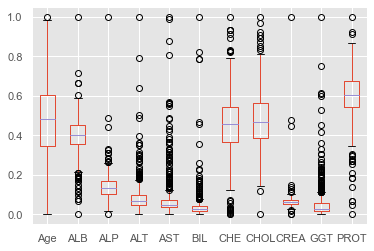

In [30]:
# boxplot of numeric attributes
numeric_col=['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']
df_minmax.boxplot(numeric_col)

<AxesSubplot:ylabel='AST'>

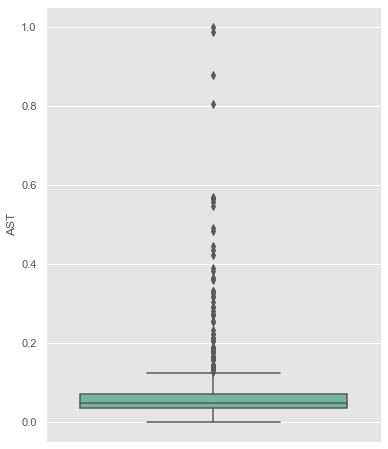

In [31]:
# an example of boxplots
f, ax = plt.subplots(figsize=(6,8))

sns.boxplot( y="AST", 
             data=df_minmax,
             palette='Set2',
             ax=ax)

**Deleting outliers with Z-score**

In [32]:
# defining a new dataframe with normal values between 3 & -3
df_clean1 = df_zscore[(np.abs(df_zscore) < 3).all(axis=1)]

In [33]:
df_clean1

Age       ALB       ALP       ALT       AST       BIL       CHE  \
0   -1.533616 -0.540739 -0.613566 -0.815675 -0.383693 -0.198236 -0.574734   
1   -1.533616 -0.540739  0.081055 -0.410629 -0.305057 -0.381375  1.349161   
2   -1.533616  0.914755  0.252759  0.305084  0.538767 -0.269457  0.291926   
3   -1.533616  0.273645 -0.633077  0.084865 -0.368571  0.381706 -0.393234   
4   -1.533616 -0.419448  0.229345  0.163515 -0.302033 -0.091404  0.432588   
..        ...       ...       ...       ...       ...       ...       ...   
603  1.750970  0.057053 -0.078942  0.454519  0.581109  0.081561 -0.316097   
607  0.457042 -0.454102 -1.218432 -1.067354 -0.132663  0.488537 -0.846983   
612  1.651437 -2.186833  0.744456 -0.980839  1.942115  1.862083 -2.965989   
613 -0.140155 -1.493741 -0.078942  0.415194  0.823066  0.437665 -2.103866   
614  1.153773 -0.973921 -0.078942  2.814012  1.367468  0.030689  0.396289   

         CHOL      CREA       GGT      PROT  recoded_sex  recoded_category  
0   -1.903634  0.497070 -0.502286 -0.564419            1                 1  
1   -0.505077 -0.146590 -0.438203  0.826054            1                 1  
2   -0.148756  0.094783 -0.115957  1.345164            1                 1  
3   -0.558525 -0.025903 -0.104971  0.677737            1                 1  
4   -0.932661 -0.106361 -0.176378 -0.620038            1                 1  
..        ...       ...       ...       ...          ...               ...  
603 -0.059676 -0.227047  1.235280  1.289545            1                 0  
607 -1.413693  1.547040  1.885266  1.975512            0                 0  
612 -1.547313 -0.293425  0.451636  1.845734            0                 0  
613 -1.039557 -0.589106  0.191642 -0.193626            0                 0  
614 -0.059676 -0.287390 -0.101309 -0.749815            0                 0  

[554 rows x 13 columns]

**Deleting outliers with IQR**

In [34]:
df_clean2 = df_minmax.copy()

In [35]:

for x in df_clean2[['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']]:  
    # finding the first and the third quartile of each column 
    q75,q25 = np.percentile(df_clean2.loc[:,x],[75,25])
    # calculating Inter Quartile Range
    IQR = q75-q25
    
    max = q75+(1.5*IQR)
    min = q25-(1.5*IQR)
    # assigning N/A to datas which are more than max or less than min
    df_clean2.loc[df_clean2[x] < min,x] = np.nan
    df_clean2.loc[df_clean2[x] > max,x] = np.nan

In [36]:
df_clean2.isnull().sum()

Age                  1
ALB                 27
ALP                 14
ALT                 36
AST                 64
BIL                 47
CHE                 24
CHOL                12
CREA                12
GGT                 65
PROT                20
recoded_sex          0
recoded_category     0
dtype: int64

In [37]:
# dropping rows that have N/A
df_clean2 = df_clean2.dropna(axis = 0)

In [38]:
df_clean2.shape

(447, 13)

# visualization

histogram of variables

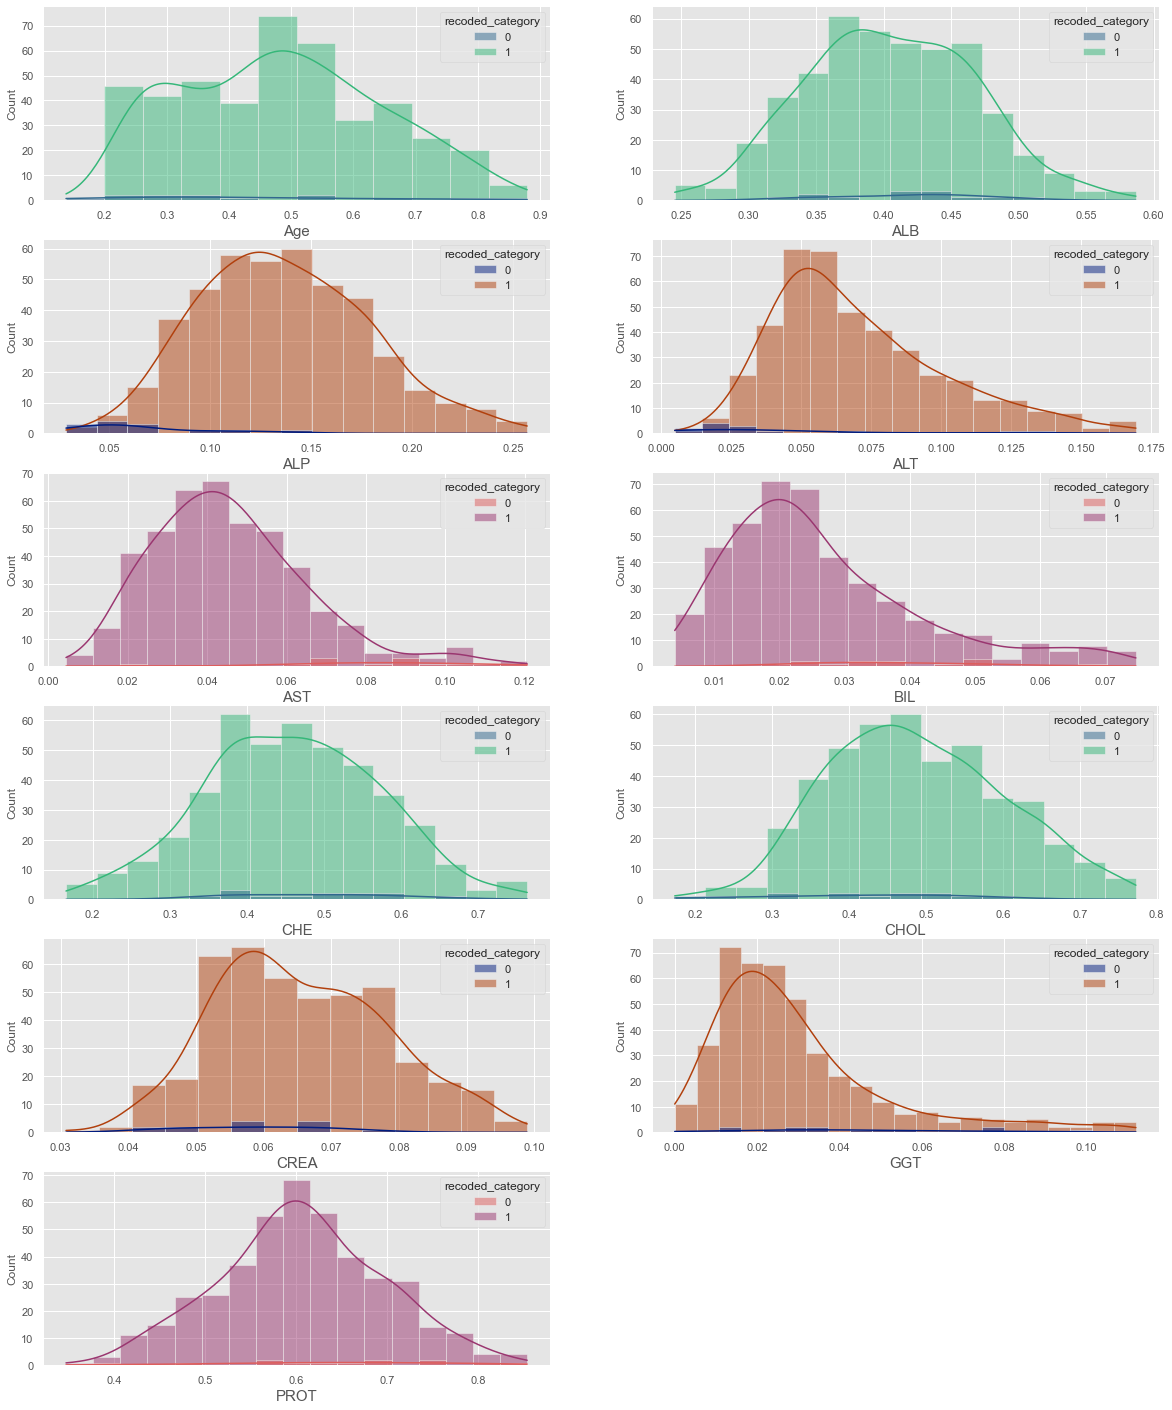

In [39]:
# difining size and number of rows and columns of histplots 
fig, ax =plt.subplots(6,2, figsize=(20,25)) 


sns.histplot(x = df_clean2["Age"], hue = df_clean2['recoded_category'], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df_clean2["ALB"], hue = df_clean2['recoded_category'], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df_clean2["ALP"], hue = df_clean2['recoded_category'], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df_clean2["ALT"], hue = df_clean2['recoded_category'], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df_clean2["AST"], hue = df_clean2['recoded_category'], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df_clean2["BIL"], hue = df_clean2['recoded_category'], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df_clean2["CHE"], hue = df_clean2['recoded_category'], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df_clean2["CHOL"], hue = df_clean2['recoded_category'], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df_clean2["CREA"], hue = df_clean2['recoded_category'], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df_clean2["GGT"], hue = df_clean2['recoded_category'], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

sns.histplot(x = df_clean2["PROT"], hue = df_clean2['recoded_category'], palette="flare", kde=True, ax=ax[5,0])
ax[5,0].set_xlabel("PROT",fontsize=15)

# removing unwanted subplot
fig.delaxes(ax[5,1])

<AxesSubplot:>

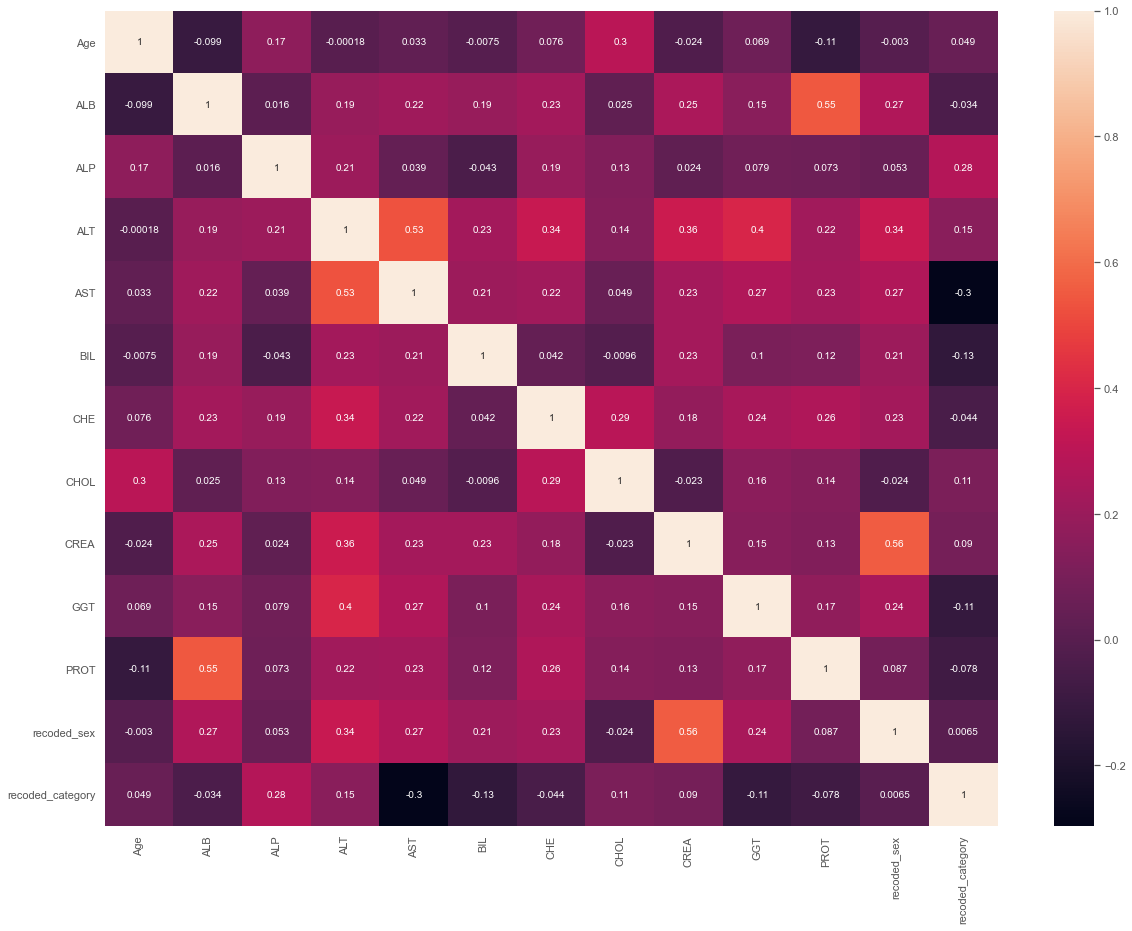

In [40]:
# the correlation matrix with heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_clean2.corr(),annot=True)

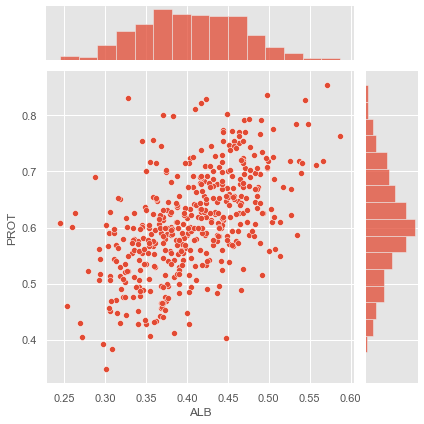

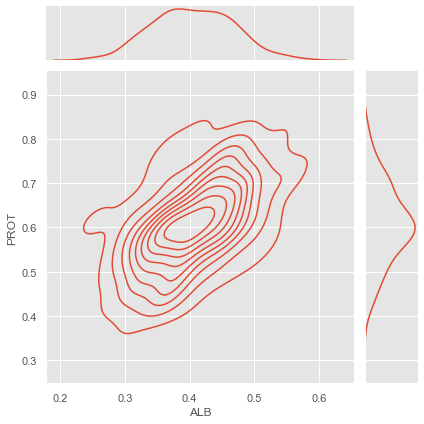

In [41]:
# jointplot of ALB & PROT with correlation=0.55
sns.jointplot(x='ALB',y='PROT',data=df_clean2)
sns.jointplot(x='ALB',y='PROT',data=df_clean2,kind="kde")

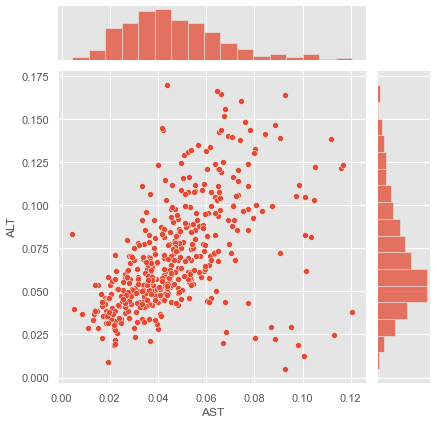

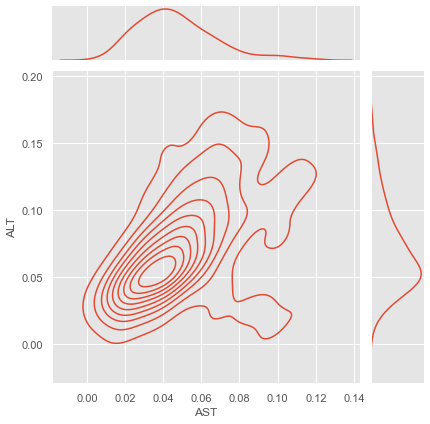

In [42]:
# jointplot of AST & ALT with correlation=0.53
sns.jointplot(x='AST',y='ALT',data=df_clean2)
sns.jointplot(x='AST',y='ALT',data=df_clean2,kind="kde")

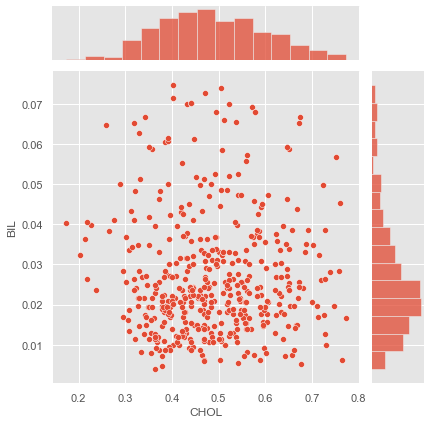

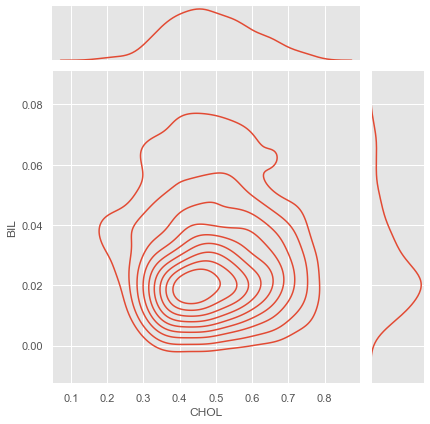

In [43]:
# jointplot of CHOL & BIL with correlation=-0.0096
sns.jointplot(x='CHOL',y='BIL',data=df_clean2)
sns.jointplot(x='CHOL',y='BIL',data=df_clean2,kind="kde")

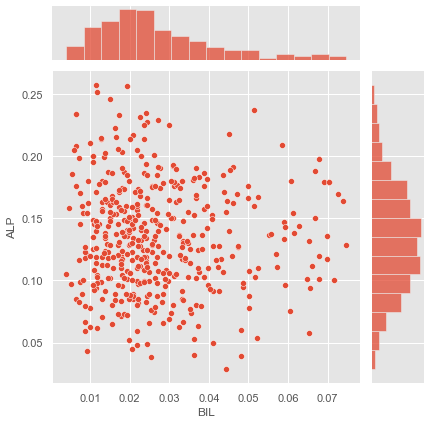

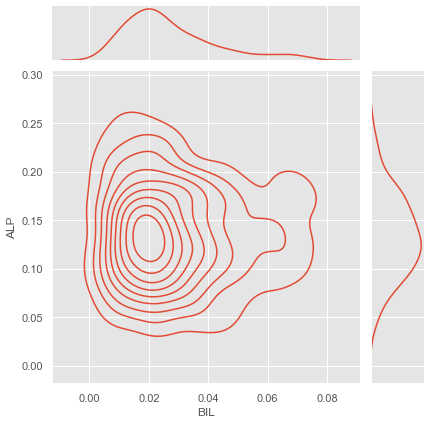

In [44]:
# jointplot of BIL & ALP with correlation=-0.043
sns.jointplot(x='BIL',y='ALP',data=df_clean2)
sns.jointplot(x='BIL',y='ALP',data=df_clean2,kind="kde")

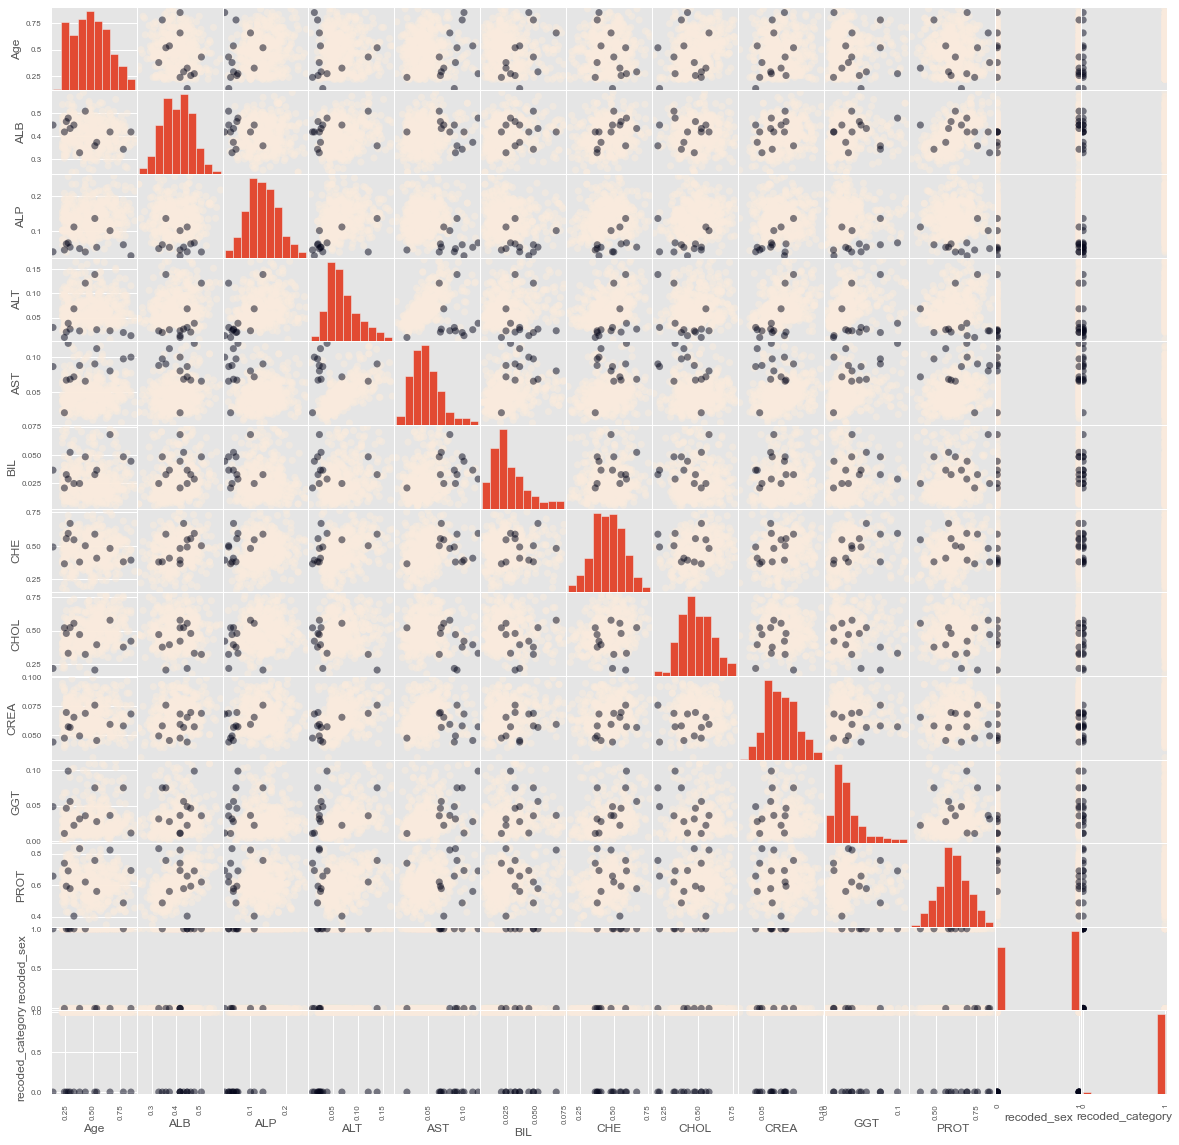

In [45]:
#scatter matrix
pd.plotting.scatter_matrix(df_clean2,c=df_clean2['recoded_category'], figsize=[20,20], s=200,)
plt.show()

Awful colors! for enhacing the output, we use 'pairplot'

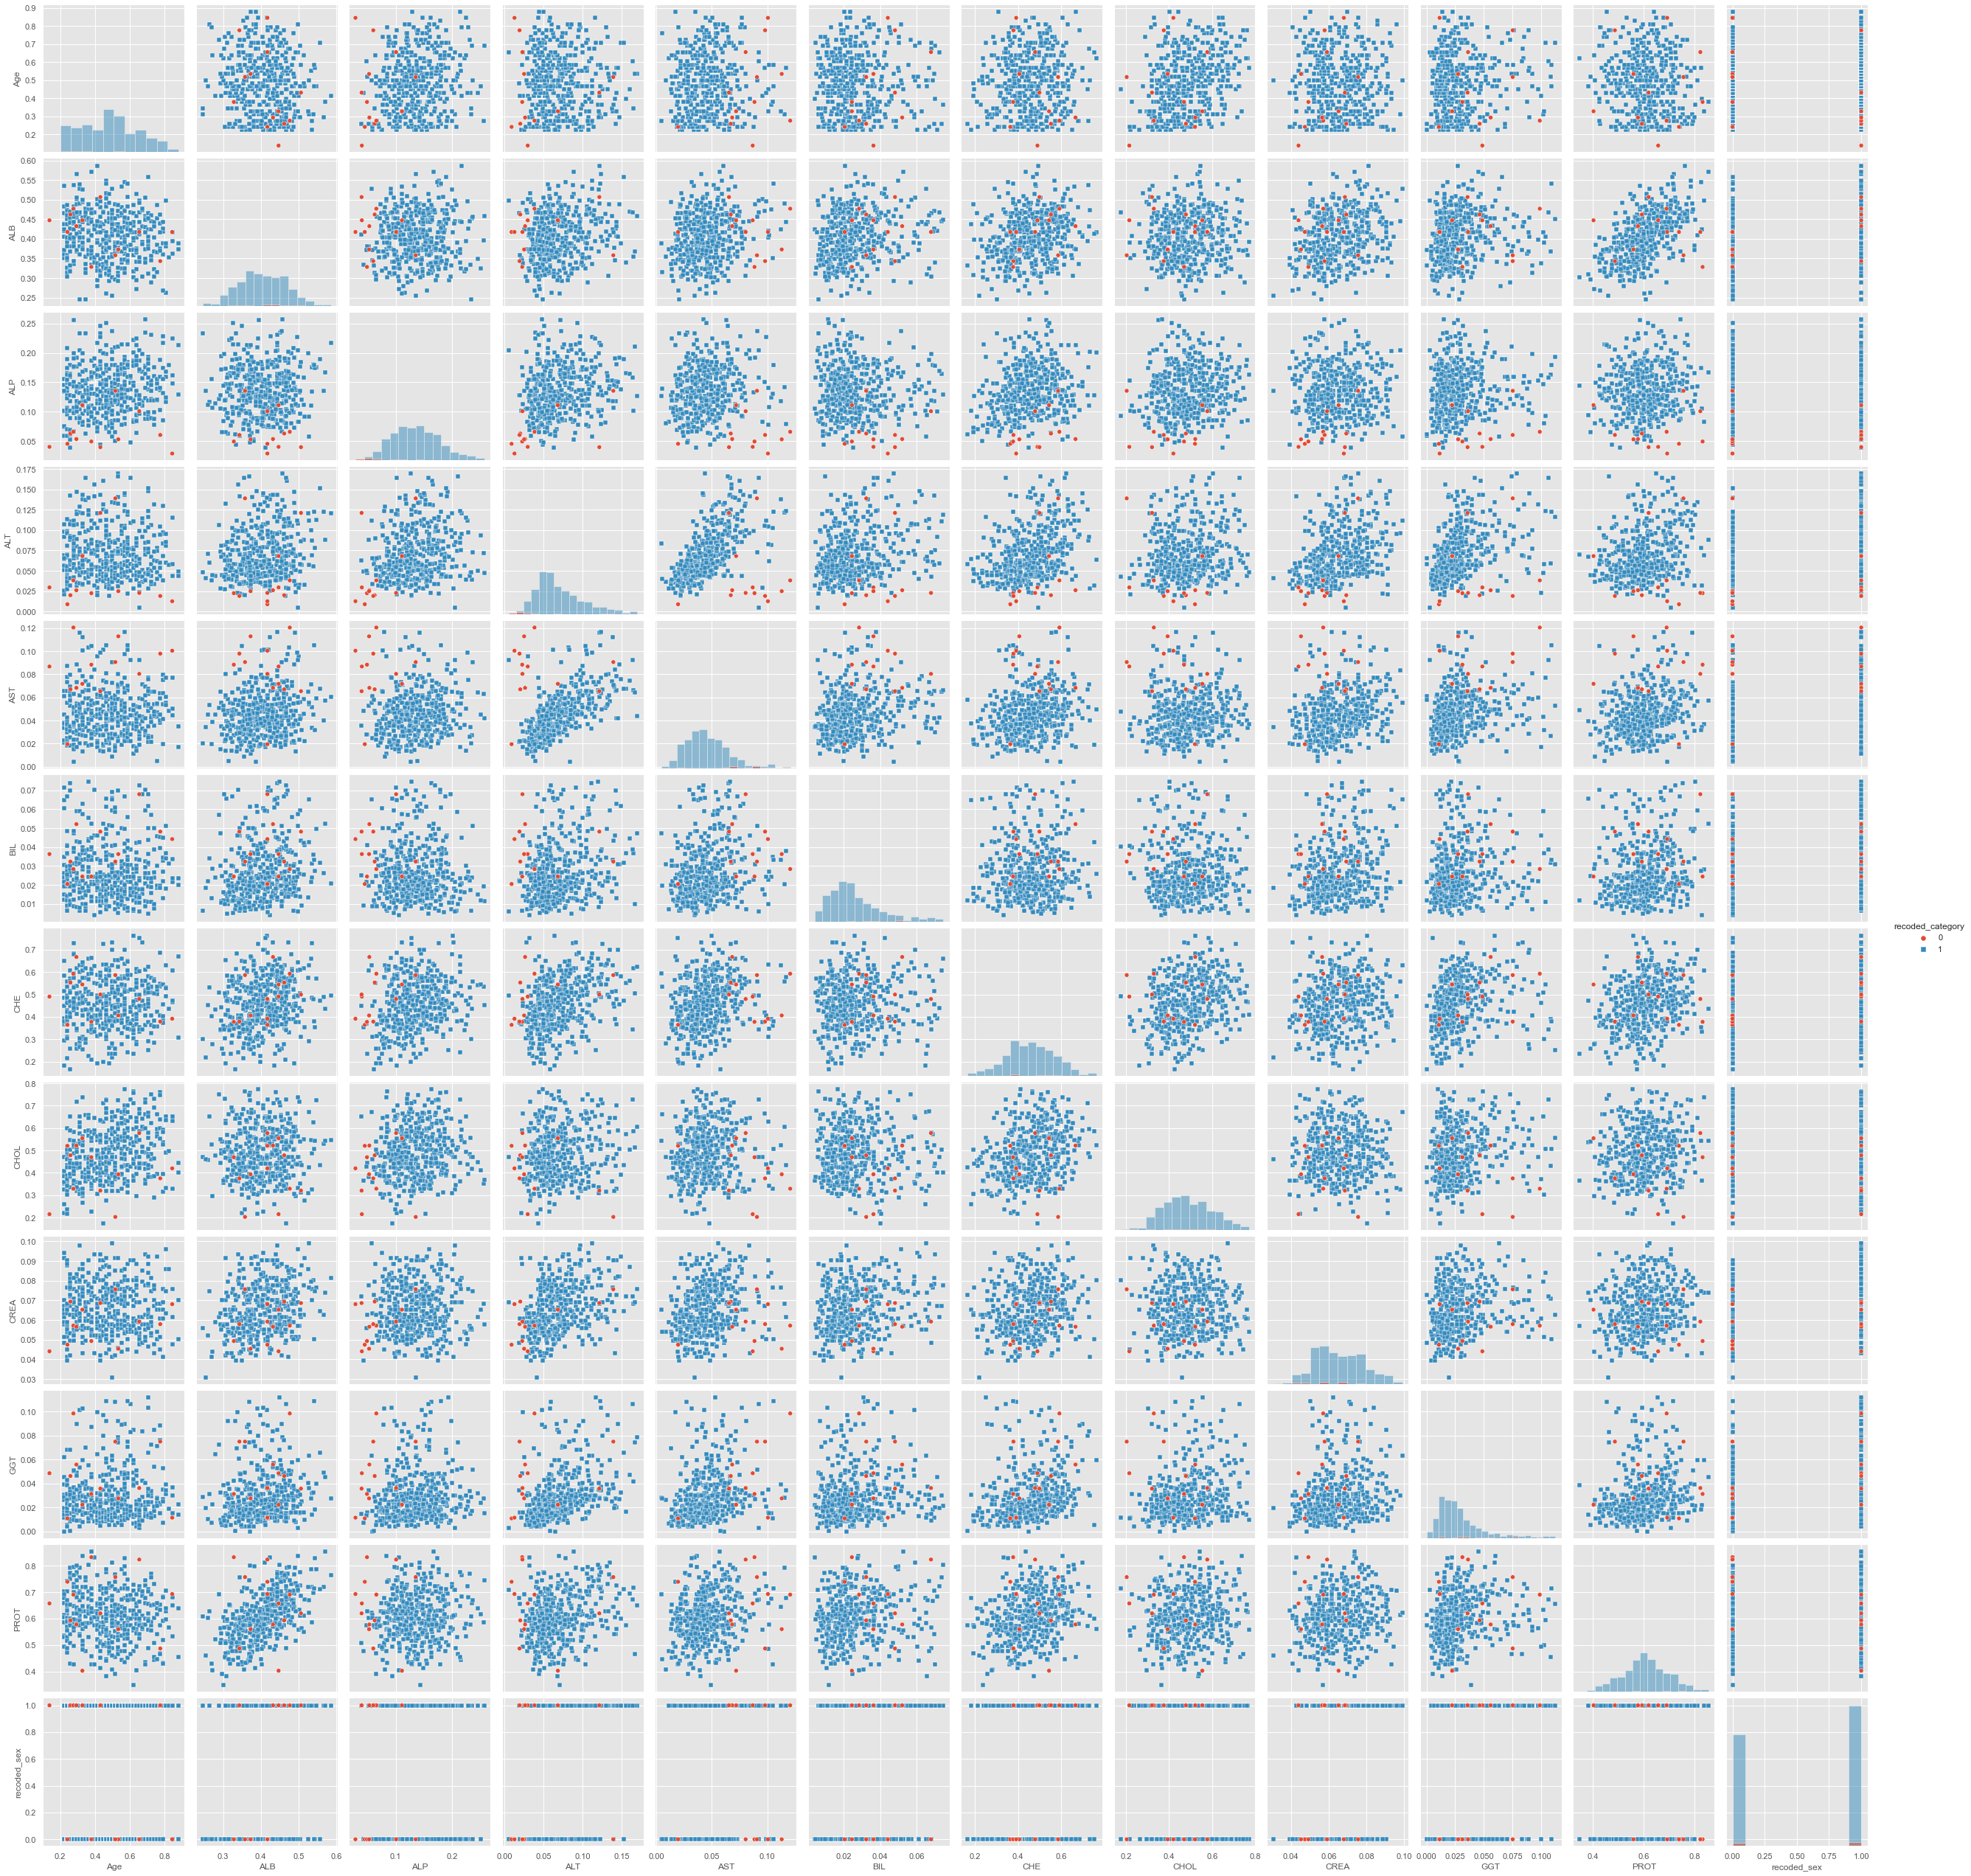

In [46]:
sns.pairplot(df_clean2,hue='recoded_category',markers=["o", "s"],height=3 , diag_kind="hist")

relplot

C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\Users\Mohammad\anaconda3\lib\site-packages\seaborn\relational.py:651: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  points = ax.scatter(*args, **kws)


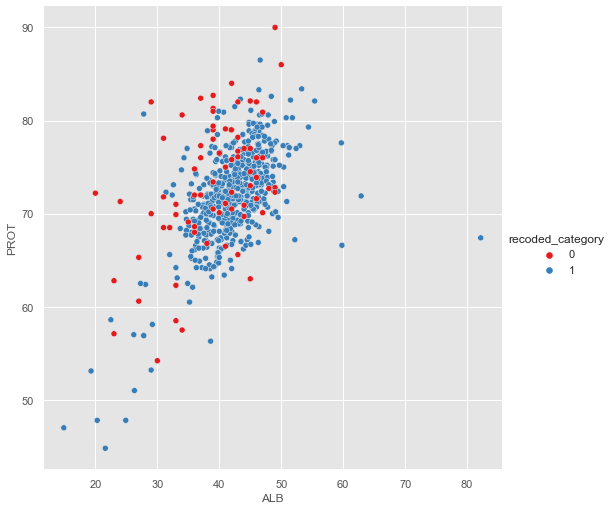

In [47]:
sns.relplot(
            x="ALB",
            y="PROT",
            hue="recoded_category", 
            data=df,
            height=7,
            palette="Set1",   
            edgeColor=None)

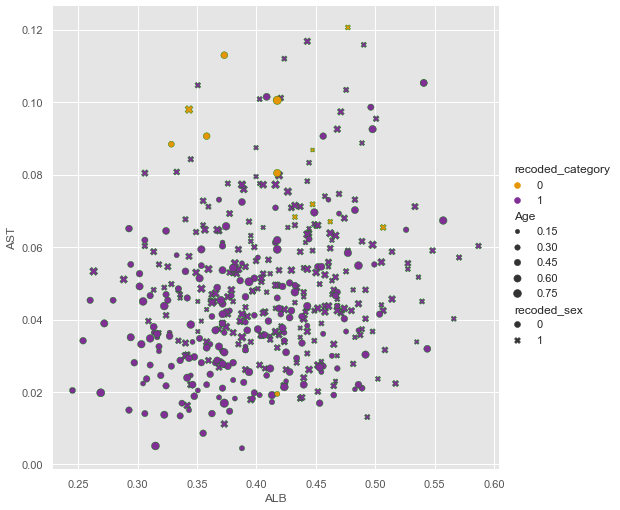

In [48]:
#adding shape $ size
sns.relplot(
            x="ALB",
            y="AST",
            hue="recoded_category",
            size="Age",   
            style="recoded_sex",  
            data=df_clean2,
            palette="CMRmap_r",
            edgecolor="green",
            height=7)

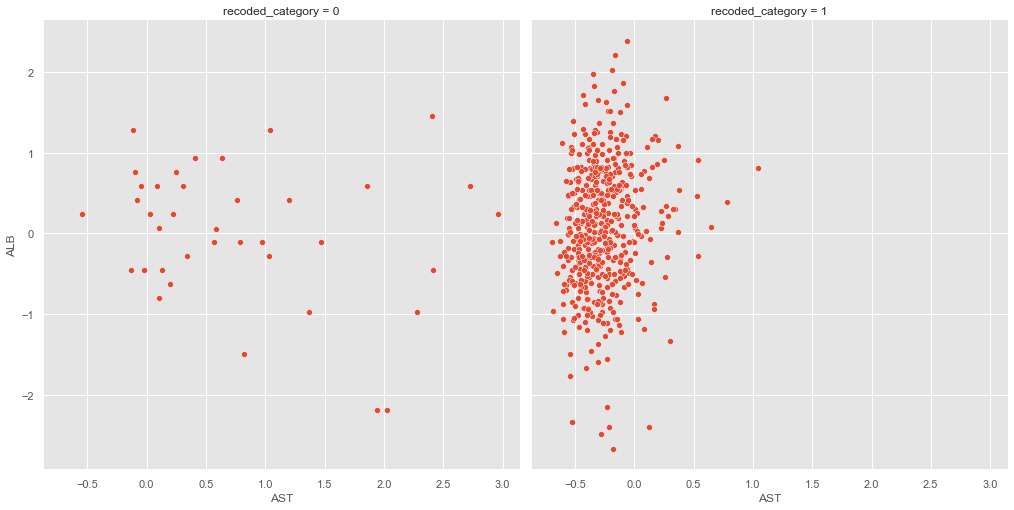

In [49]:
sns.relplot(x="AST",
            y="ALB",
            col="recoded_category", # according to recoded category values devides the chart into 2 columns
            data=df_clean1,
            height=7)

stripplot

<AxesSubplot:xlabel='recoded_sex', ylabel='Age'>

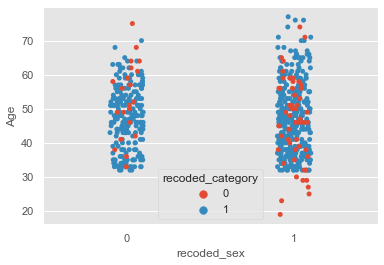

In [50]:
sns.stripplot(x="recoded_sex", y="Age", hue="recoded_category", data=df)

# Dealing with imbalanced data 

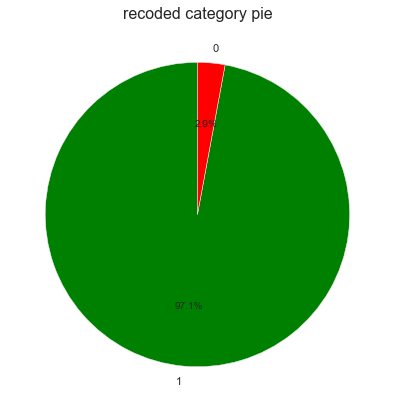

1    434
0     13
Name: recoded_category, dtype: int64

In [51]:
#visualizing imbalaced classes with piechart
labels =df_clean2["recoded_category"].value_counts(sort = True).index
counts = df_clean2["recoded_category"].value_counts(sort = True)
colors = ["Green","Red"]
plt.figure(figsize=(7,7))
plt.pie(counts,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("recoded category pie", fontsize=16)
plt.show()
# showing the counts of each class
df_clean2["recoded_category"].value_counts()

In [52]:
#!pip install imblearn

In [53]:
# oversampling the classes with SMOTE method
from imblearn.over_sampling import SMOTE
x,y = df_clean2.drop("recoded_category",axis=1),df_clean2["recoded_category"]
smote = SMOTE()
x,y = smote.fit_resample(x,y)

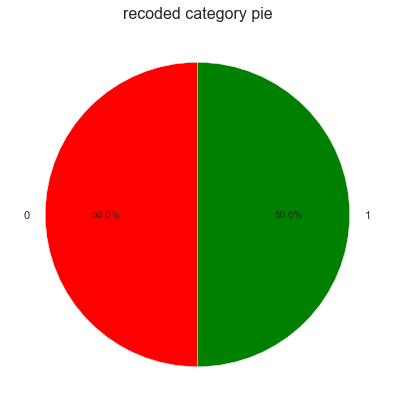

0    434
1    434
Name: recoded_category, dtype: int64

In [54]:
labels =y.value_counts(sort = True).index
counts = y.value_counts(sort = True)
colors = ["Red","Green"]
plt.figure(figsize=(7,7))
plt.pie(counts,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)
plt.title("recoded category pie",fontsize=16)
plt.show()
# showing the counts of each class after oversampling
y.value_counts()

# Train and Test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# splitting the data with 25% of test sample and 75% of train sample
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42, stratify=y )

In [57]:
x_train.shape , x_test.shape

((651, 12), (217, 12))

# KNN:K-Nearest Neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
# fitting knn model after hyperparameter tuning

In [59]:
# Evaluating the model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict=knn.predict(x_test)
print("Accuracy on testing data: ",knn.score(x_test,y_test))
print("Accuracy on training data: ",knn.score(x_train,y_train))

Accuracy on testing data:  0.967741935483871
Accuracy on training data:  0.9662058371735791


**Overfitting and Underfitting**

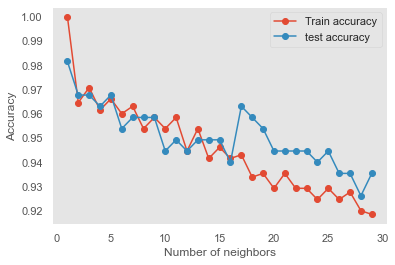

In [60]:
# considering the number of neighbors evaluate overfitting
neighbors= np.arange(1,30)
# defining empty arrays in length of neighbors
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
#getting each neighbors' accuracy for test and train
for i, k in enumerate(neighbors):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i]=knn_model.score(x_train, y_train)
    test_accuracy[i]=knn_model.score(x_test, y_test)

    
plt.plot(neighbors, train_accuracy, label='Train accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='test accuracy', marker='o')  
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

According to the diagram above, the optimal "K" is equal to 3

**Calculating error for K values**

In [61]:
error = []
#getting each neighbors' error for test
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    #appending average of each k-neighbor's error
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

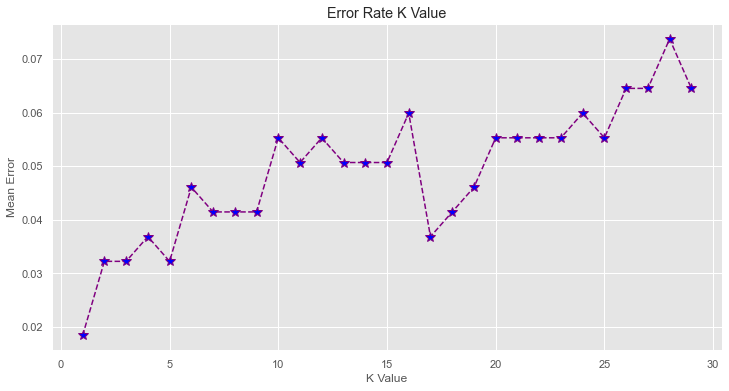

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='purple', linestyle='dashed', marker='*' ,
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

According to the diagram above, the optimal "K" is equal to 3

grid search

In [63]:
# grid searching key hyperparameters
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define the model with default hyperparameters
model = KNeighborsClassifier()
# define the grid of values to search
grid = dict()
grid['n_neighbors'] = [1,2,3,4,5,6,7,8,9,10]
grid['metric'] = ['euclidean','manhattan','chebyshev','minkowski','mahalanobis']
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976970 using {'metric': 'manhattan', 'n_neighbors': 1}
0.963652 (0.023271) with: {'metric': 'euclidean', 'n_neighbors': 1}
0.952378 (0.024243) with: {'metric': 'euclidean', 'n_neighbors': 2}
0.960575 (0.020465) with: {'metric': 'euclidean', 'n_neighbors': 3}
0.950326 (0.024996) with: {'metric': 'euclidean', 'n_neighbors': 4}
0.958531 (0.021016) with: {'metric': 'euclidean', 'n_neighbors': 5}
0.946232 (0.027113) with: {'metric': 'euclidean', 'n_neighbors': 6}
0.952378 (0.023246) with: {'metric': 'euclidean', 'n_neighbors': 7}
0.942137 (0.027091) with: {'metric': 'euclidean', 'n_neighbors': 8}
0.949814 (0.026003) with: {'metric': 'euclidean', 'n_neighbors': 9}
0.937016 (0.030765) with: {'metric': 'euclidean', 'n_neighbors': 10}
0.976970 (0.018417) with: {'metric': 'manhattan', 'n_neighbors': 1}
0.967747 (0.021453) with: {'metric': 'manhattan', 'n_neighbors': 2}
0.971841 (0.019452) with: {'metric': 'manhattan', 'n_neighbors': 3}
0.963147 (0.022227) with: {'metric': 'manhattan', 'n

C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.9636519  0.95237762 0.96057498 0.95032634 0.95853147 0.94623155
 0.95237762 0.94213675 0.94981352 0.93701632 0.9769697  0.9677467
 0.97184149 0.96314685 0.9703108  0.96161616 0.96672883 0.9600777
 0.9677467  0.96006216 0.95646465 0.92982906 0.9400777  0.91652681
 0.92675991 0.91294483 0.92471639 0.91296037 0.92266511 0.91296814
 0.9636519  0.95237762 0.96057498 0.95032634 0.95853147 0.94623155
 0.95237762 0.94213675 0.94981352 0.93701632        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
  warnings.warn(


the best parameters offered by grid search are [ metric: manhattan, n_neighbors: 3 ]

classification report

In [64]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 3)
knn.fit(x_train, y_train)
y_predict=knn.predict(x_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       109
           1       1.00      0.94      0.97       108

    accuracy                           0.97       217
   macro avg       0.97      0.97      0.97       217
weighted avg       0.97      0.97      0.97       217



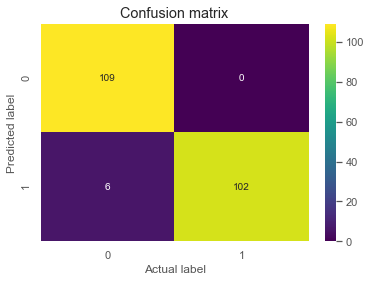

In [67]:
# evaluating model result with confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_knn, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_predict=dtc.predict(x_test)
print("Accuracy on testing data: ",dtc.score(x_test,y_test))
print("Accuracy on training data: ",dtc.score(x_train,y_train))

Accuracy on testing data:  0.9953917050691244
Accuracy on training data:  1.0


**hyperparameter tuning**

grid search

In [70]:
# grid searching key hyperparameters
# define the model with default hyperparameters
model = DecisionTreeClassifier()
# define the grid of values to search
grid = dict()
grid['max_depth'] = [1,2,3,4,5,6,7,8,9,10,11]
grid['min_samples_split'] = [1,2,3,4,5,6,7,8,9]
grid['ccp_alpha'] = [0,0.001,0.002,0.003,0.004]
grid['criterion'] = ["gini" , "entropy"]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.984134 using {'ccp_alpha': 0.002, 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 3}
nan (nan) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 1}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 3}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 4}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 6}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 7}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 8}
0.888384 (0.035249) with: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth'

C:\Users\Mohammad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88838384 0.88838384 0.88838384 0.88838384 0.88838384
 0.88838384 0.88838384 0.88838384        nan 0.95392385 0.95392385
 0.95392385 0.95392385 0.95392385 0.95392385 0.95392385 0.95392385
        nan 0.96878011 0.96775447 0.96775447 0.96775447 0.96878011
 0.96878011 0.96878011 0.96826729        nan 0.97134421 0.97133644
 0.9728749  0.97081585 0.97236985 0.97185703 0.97236985 0.97236985
        nan 0.97748252 0.97749029 0.97595183 0.9769697  0.97696193
 0.97390054 0.97543901 0.97543124        nan 0.97900544 0.9805439
 0.98003108 0.97849262 0.97748252 0.97747475 0.9779798  0.97696193
        nan 0.98156177 0.98053613 0.98207459 0.97899767 0.97850816
 0.97900544 0.97593629 0.9779798         nan 0.98002331 0.98053613
 0.98003108 0.98207459 0.97952603 0.98106449 0.97799534 0.97850039
        nan 0.98208236 0.9805439  0.98209013 0.9820

classification report

In [93]:
dtc=DecisionTreeClassifier(ccp_alpha= 0.002, criterion= 'gini', max_depth= 8, min_samples_split= 3)
dtc.fit(x_train, y_train)
y_predict=dtc.predict(x_test)

In [94]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.99      1.00       108

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



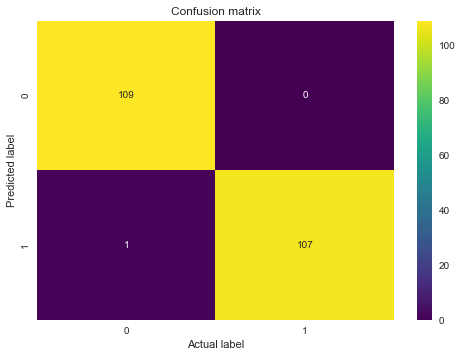

In [95]:
# evaluating model result with confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_dt, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

plotting the decision tree

In [74]:
from sklearn.tree import plot_tree

[Text(558.0, 1009.5428571428572, 'AST <= 0.065\ngini = 0.5\nsamples = 651\nvalue = [325, 326]\nclass = un healthy'),
 Text(186.0, 854.2285714285715, 'ALT <= 0.018\ngini = 0.15\nsamples = 306\nvalue = [25, 281]\nclass = un healthy'),
 Text(93.0, 698.9142857142858, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = healthy'),
 Text(279.0, 698.9142857142858, 'PROT <= 0.742\ngini = 0.034\nsamples = 286\nvalue = [5, 281]\nclass = un healthy'),
 Text(186.0, 543.6, 'gini = 0.008\nsamples = 262\nvalue = [1, 261]\nclass = un healthy'),
 Text(372.0, 543.6, 'PROT <= 0.749\ngini = 0.278\nsamples = 24\nvalue = [4, 20]\nclass = un healthy'),
 Text(279.0, 388.28571428571433, 'Age <= 0.538\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = healthy'),
 Text(186.0, 232.97142857142865, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = healthy'),
 Text(372.0, 232.97142857142865, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = un healthy'),
 Text(465.0, 388.28571428571433, 'gini = 0.0\nsamples = 19\nval

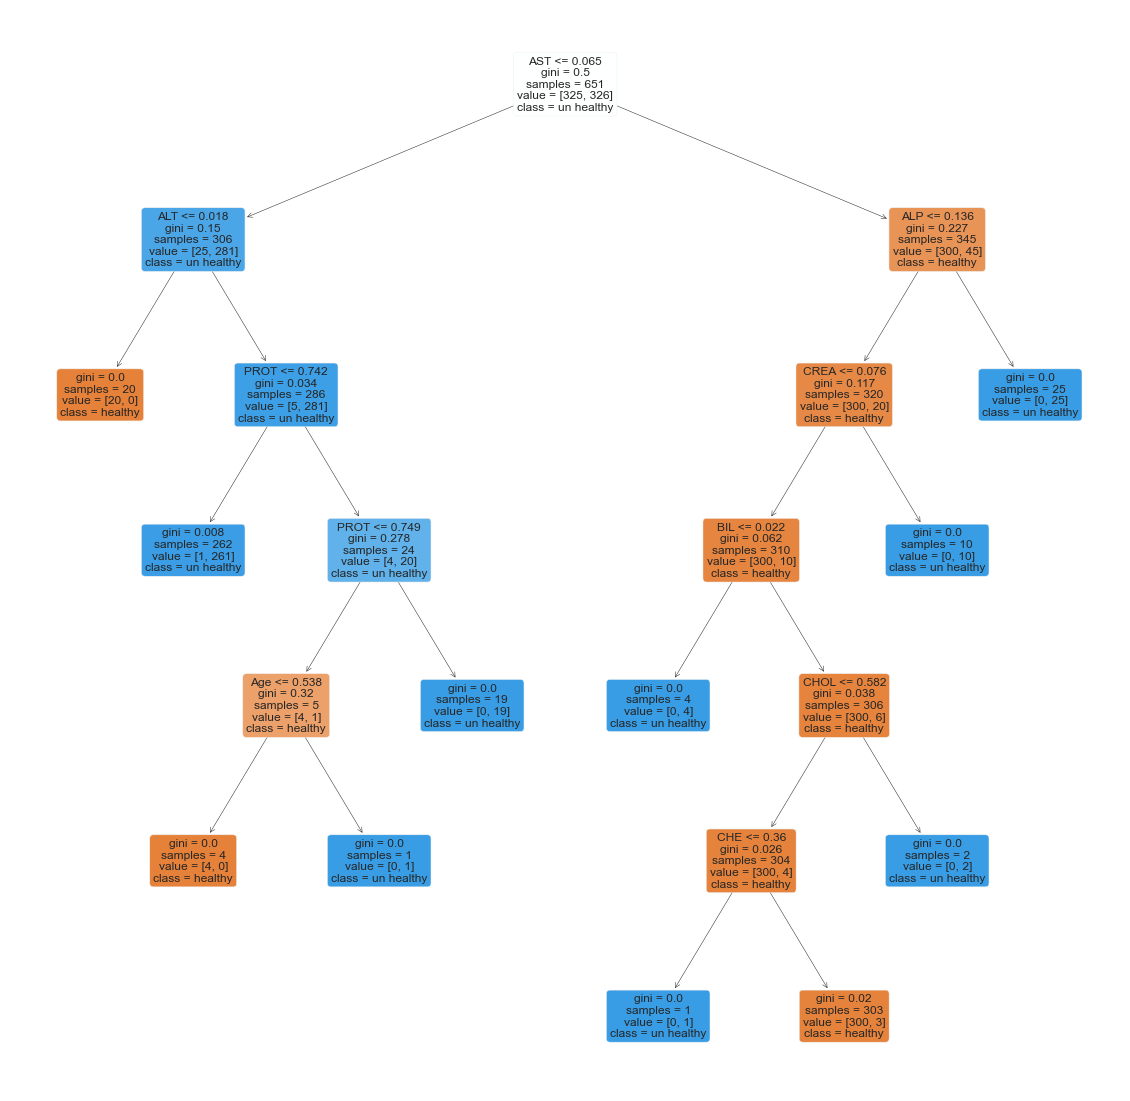

In [75]:
plt.figure(figsize = (20,20))
plot_tree(dtc, feature_names = x.columns, 
          class_names = ['healthy' , 'un healthy'], filled =True, fontsize=12,rounded=True,impurity=True)

# SVM:Support Vector Machine

In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC()
svc.fit(x_train,y_train)
y_predict = svc.predict(x_test)
print("Accuracy on testing data: ",svc.score(x_test,y_test))
print("Accuracy on training data: ",svc.score(x_train,y_train))

Accuracy on testing data:  0.9769585253456221
Accuracy on training data:  0.9708141321044547


**Hyperparameter tuning for SVM**

grid search

In [78]:
# grid searching key hyperparameters
# define the model with default hyperparameters
model = SVC()
# define the grid of values to search
grid = dict()
grid['kernel']=['linear','rbf','poly','sigmoid']
grid['degree'] = [1,2,3,4,5,6,7,8,9]
grid['gamma'] = ['scale' , 'auto']
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.990785 using {'degree': 6, 'gamma': 'scale', 'kernel': 'poly'}
0.884763 (0.042788) with: {'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
0.959534 (0.018437) with: {'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.888850 (0.044406) with: {'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
0.598011 (0.047316) with: {'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.884763 (0.042788) with: {'degree': 1, 'gamma': 'auto', 'kernel': 'linear'}
0.766946 (0.049851) with: {'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.687110 (0.066129) with: {'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.678415 (0.068142) with: {'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.884763 (0.042788) with: {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.959534 (0.018437) with: {'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.973893 (0.015936) with: {'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.598011 (0.047316) with: {'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.884763 

classification report

In [96]:
svc=SVC(degree= 6, gamma= 'scale', kernel= 'poly')
svc.fit(x_train, y_train)
y_predict=svc.predict(x_test)

In [97]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       1.00      0.98      0.99       108

    accuracy                           0.99       217
   macro avg       0.99      0.99      0.99       217
weighted avg       0.99      0.99      0.99       217



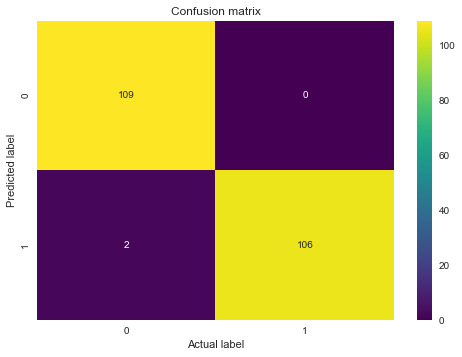

In [98]:
# evaluating model result with confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_svc, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

# Bagging

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

In [83]:
# evaluate bagging algorithm for classification
model = BaggingClassifier()
cv = RepeatedStratifiedKFold(n_splits=5 , n_repeats=2 ,random_state=0)
score = cross_val_score(model , x , y , scoring='accuracy' ,cv=cv, n_jobs=-1)
print (
        f"Mean Accuracy: {np.mean(score):.3f} \nStd :{np.std(score):.3f}")
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("Accuracy on testing data: ",model.score(x_test,y_test))
print("Accuracy on training data: ",model.score(x_train,y_train))

Mean Accuracy: 0.987 
Std :0.009
Accuracy on testing data:  0.9815668202764977
Accuracy on training data:  0.9969278033794163


**Hyperparameters tuning for bagging**

grid search

In [84]:
# grid searching key hyperparameters
# define the model with default hyperparameters
model = BaggingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10 , 25 , 50 , 100 , 150, 200 , 400]
grid['max_samples'] = [.1 , .25 , .5 , .75 , 1.]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988741 using {'max_samples': 0.75, 'n_estimators': 25}
0.953939 (0.024635) with: {'max_samples': 0.1, 'n_estimators': 10}
0.967249 (0.017997) with: {'max_samples': 0.1, 'n_estimators': 25}
0.968283 (0.018890) with: {'max_samples': 0.1, 'n_estimators': 50}
0.970793 (0.024280) with: {'max_samples': 0.1, 'n_estimators': 100}
0.975921 (0.020495) with: {'max_samples': 0.1, 'n_estimators': 150}
0.974406 (0.017886) with: {'max_samples': 0.1, 'n_estimators': 200}
0.974926 (0.019191) with: {'max_samples': 0.1, 'n_estimators': 400}
0.971336 (0.019708) with: {'max_samples': 0.25, 'n_estimators': 10}
0.982098 (0.014311) with: {'max_samples': 0.25, 'n_estimators': 25}
0.977995 (0.017587) with: {'max_samples': 0.25, 'n_estimators': 50}
0.980031 (0.015943) with: {'max_samples': 0.25, 'n_estimators': 100}
0.982587 (0.014161) with: {'max_samples': 0.25, 'n_estimators': 150}
0.981577 (0.013350) with: {'max_samples': 0.25, 'n_estimators': 200}
0.982090 (0.014309) with: {'max_samples': 0.25, 'n_es

classification report

In [99]:
# fitting bagging model
bag_model = BaggingClassifier(n_estimators=25,max_samples=.75)
bag_model.fit(x_train,y_train)
predbag = bag_model.predict(x_test)
# defining a variable for final camparison between models results
Baggingscore = bag_model.score(x_test,y_test)
print(classification_report(y_test, predbag))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       1.00      0.98      0.99       108

    accuracy                           0.99       217
   macro avg       0.99      0.99      0.99       217
weighted avg       0.99      0.99      0.99       217



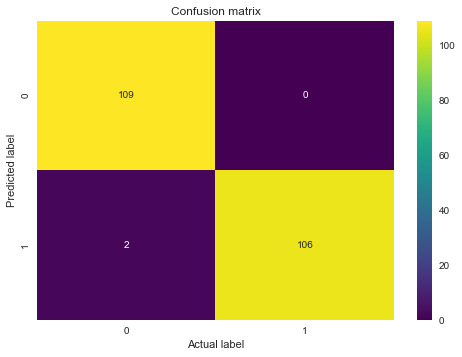

In [100]:
# evaluating model result with confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
cm_bag = confusion_matrix(y_test, predbag)
sns.heatmap(cm_bag, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

# Boosting

boosting with Ada boosting classifier

In [87]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostClassifier
# define the model
Adamodel = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(Adamodel, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
Adamodel.fit(x_train,y_train)
# report performance
print(f"Accuracy \nMean : {np.mean(n_scores):.3f} \nStd : {np.std(n_scores):.3f}")
print("Accuracy on testing data: ",Adamodel.score(x_test,y_test))
print("Accuracy on training data: ",Adamodel.score(x_train,y_train))

Accuracy 
Mean : 0.989 
Std : 0.009
Accuracy on testing data:  0.9907834101382489
Accuracy on training data:  1.0


**Hyperparameters for boosting**

Grid Search AdaBoost Hyperparameters

In [88]:
# grid searching key hyperparameters
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [ 0.01, 0.1,0.5, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988236 using {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}
0.888384 (0.035249) with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 10}
0.889402 (0.035150) with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
0.884786 (0.036569) with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 100}
0.957506 (0.022306) with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 500}
0.888881 (0.036133) with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 10}
0.959557 (0.022229) with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
0.963644 (0.019991) with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}
0.981562 (0.017002) with: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
0.959021 (0.022577) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 10}
0.980039 (0.013808) with: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators

classification report

In [89]:
# fitting Adaboosting model
Ada_model = AdaBoostClassifier(n_estimators=500,learning_rate=1,algorithm= "SAMME.R")
Ada_model.fit(x_train,y_train)
pred = Ada_model.predict(x_test)
# defining a variable for final camparison between models results
Adaboostscore = Ada_model.score(x_test,y_test)
print(classification_report(y_test, pred))
print(Ada_model.score(x_train,y_train))
print(Ada_model.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.99      1.00       108

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217

1.0
0.9953917050691244


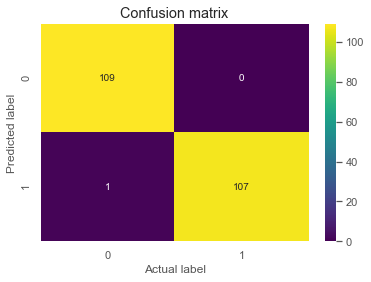

In [90]:
# evaluating model result with confusion matrix using heatmap
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(y_test, pred)
sns.heatmap(cm_ada, annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

**ROC curve**

roc_auc_score for KNN:  0.9811416921508664
roc_auc_score for DecisionTree:  0.9907407407407407
roc_auc_score for SVM:  0.9970268433571186
roc_auc_score for Bagging:  0.9999150526673461
roc_auc_score for Boosting:  0.9997451580020388


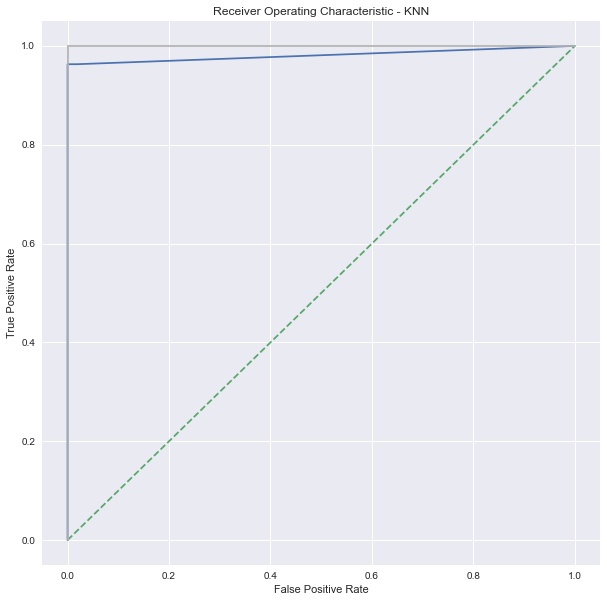

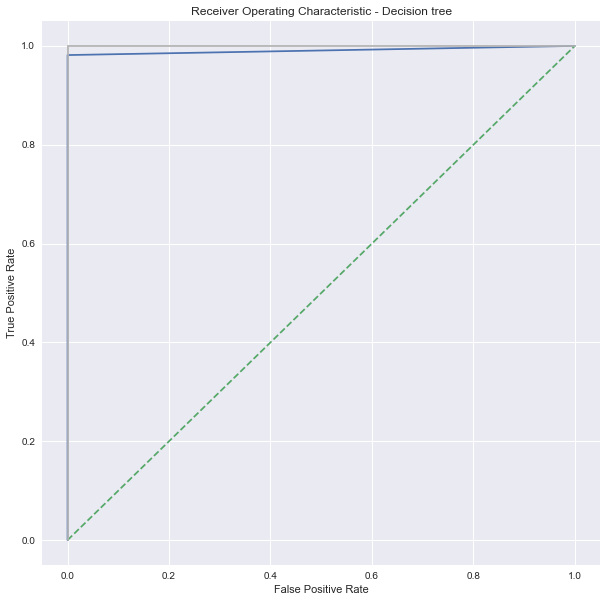

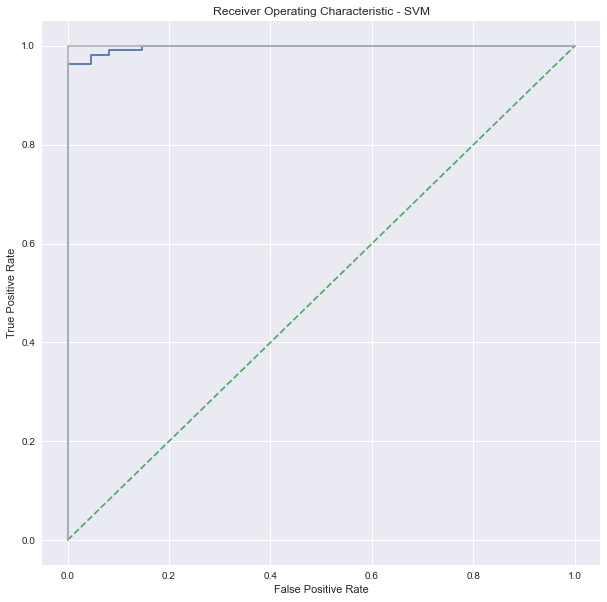

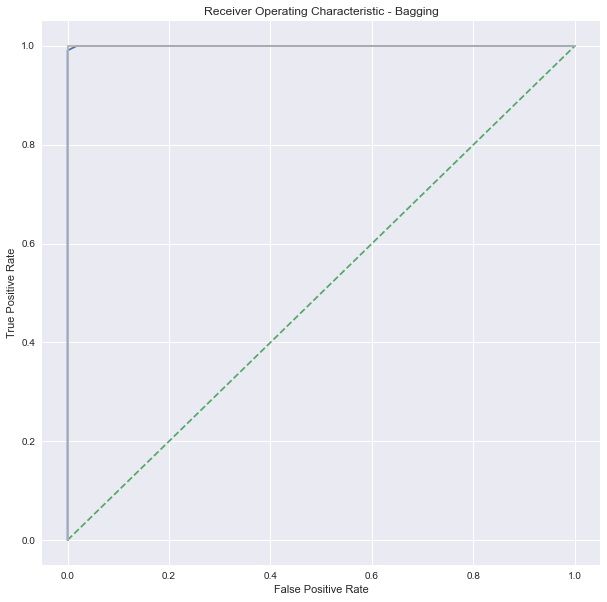

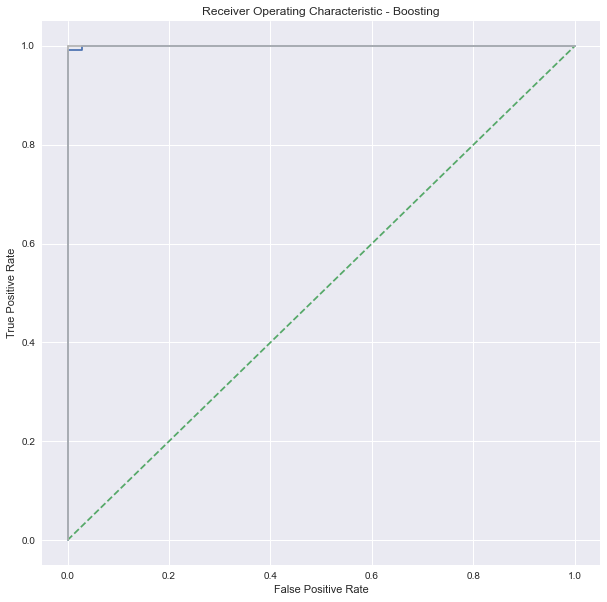

In [101]:
# How to plot a ROC Curve in Python

from sklearn.metrics import roc_curve, roc_auc_score
   
# Create classifier
clf1 = KNeighborsClassifier()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)
clf4 = BaggingClassifier()
clf5 = AdaBoostClassifier()
# Train model
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)
clf5.fit(x_train, y_train)
    
# Get predicted probabilities
y_score1 = clf1.predict_proba(x_test)[:,1]
y_score2 = clf2.predict_proba(x_test)[:,1]
y_score3 = clf3.predict_proba(x_test)[:,1]
y_score4 = clf4.predict_proba(x_test)[:,1]
y_score5 = clf5.predict_proba(x_test)[:,1]
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score1)) 
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score3))
print('roc_auc_score for Bagging: ', roc_auc_score(y_test, y_score4))
print('roc_auc_score for Boosting: ', roc_auc_score(y_test, y_score5))
# Plot ROC curves
plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - Decision tree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - Bagging')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))    
plt.title('Receiver Operating Characteristic - Boosting')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
    

# Comparison between Accuracy of Models

Text(0.5, 1.03, 'Comparison between Accuracy of Models')

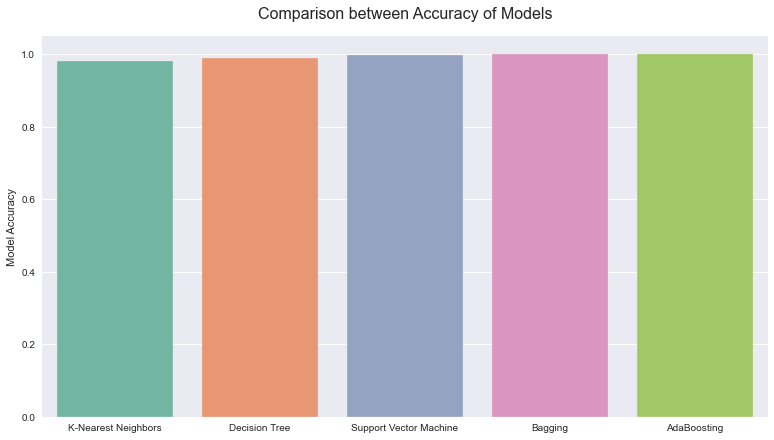

In [92]:
plt.style.use("seaborn")

x = ["K-Nearest Neighbors", "Decision Tree", "Support Vector Machine", "Bagging", "AdaBoosting"]

y = [ roc_auc_score(y_test, y_score1), roc_auc_score(y_test, y_score2), roc_auc_score(y_test, y_score3)
     , roc_auc_score(y_test, y_score4), roc_auc_score(y_test, y_score5)]

fig, ax = plt.subplots(figsize=(13,7))
axe=sns.barplot(x=x,y=y, palette="Set2")
plt.ylabel("Model Accuracy")
plt.title("Comparison between Accuracy of Models", fontsize=16, y=1.03)